In [19]:
from IPython.display import Markdown, Latex
displaym = lambda markdown : display(Markdown(markdown))
from spotifyUtil import get_spotify_client
spotify = get_spotify_client()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

---
# Collect All My Playlists

In [2]:
my_playlists = []
offset = 0
append_playlists = spotify.current_user_playlists(offset=offset)["items"]
while len(append_playlists) > 0:
    my_playlists += append_playlists
    offset += len(append_playlists)
    append_playlists = spotify.current_user_playlists(offset=offset)["items"]
displaym("""
## My Playlists  
Collected **{}** playlists
""".format(
    len(my_playlists)
))


## My Playlists  
Collected **69** playlists


---
# Union **WoofBeats&trade;** Monthly Playlists

In [8]:
WoofBeats_playlists = [
    p for p in my_playlists 
    if "WoofBeats" in p["name"] and "20" in p["name"]
]

# get tracks
for playlist in WoofBeats_playlists:
    playlist.update({
        "tracks":spotify.playlist_tracks(playlist["id"]) 
    })

displaym(
"""
## **List WoofBeats&trade;** 2021 Monthly Playlists
 - {}
---
""".format(
    " \n- ".join([
        "{}: **{}** songs".format(
            playlist["name"], 
            len(playlist["tracks"]["items"])
        ) 
        for playlist in WoofBeats_playlists
    ])
))


## **List WoofBeats&trade;** 2021 Monthly Playlists
 - WoofBeats-2021-12: **26** songs 
- WoofBeats-2021-11: **23** songs 
- WoofBeats-2021-10: **27** songs 
- WoofBeats-2021-09: **34** songs 
- WoofBeats-2021-08: **29** songs 
- WoofBeats-2021-07: **30** songs 
- WoofBeats-2021-06: **50** songs 
- WoofBeats-2021-05: **37** songs 
- WoofBeats-2021-04: **50** songs 
- WoofBeats-2021-03: **38** songs 
- WoofBeats-2021-02: **45** songs 
- WoofBeats-2021-01: **56** songs 
- WoofBeats-2020-12: **46** songs
---


## Format/Enrich **WoofBeats&trade;** Tracks

In [74]:
WoofBeats_tracks = [
    {
        "playlist_name": playlist["name"],
        "playlist_id": playlist["id"],
        "added_by": track["added_by"]["id"],
        **track["track"]
    }
    for playlist in WoofBeats_playlists
    for track in playlist["tracks"]["items"]
]

WoofBeats_tracks = [
    {
        "track_id" : track["id"],
        "track_name" :track["name"],
        "track_duration_ms" : track["duration_ms"],
        "track_popularity" : track["popularity"],
        "track_explicit" : track["explicit"],
        # **{
        #     "track_" + key:value 
        #     for key, value in spotify.audio_features([track["id"]])[0].items()
        # },
        "album_name" : track["album"]["name"],
        "album_release_date" : track["album"]["release_date"],
        "album_id" : track["album"]["id"],
        "artist_id" : track["artists"][0]["id"],
        "artist_name" : track["artists"][0]["name"],
        "playlist_name" : track["playlist_name"],
        "playlist_id" : track["playlist_id"],
        "added_by": track["added_by"]
    }
    for track in WoofBeats_tracks
]

added_by_map = {
    "12167264510" : "Dakota",
    "12145760918" : "Dan"
}

for track in WoofBeats_tracks:
    added_by = track["added_by"]
    track["added_by"] = added_by_map[added_by] if added_by in added_by_map else added_by

# for track in WoofBeats_tracks:
#     for key in [
#         "track_type",
#         "track_uri",
#         "track_track_href",
#         "track_analysis_url",
#         ]:
#         del track[key]
        
WoofBeats_df = pd.DataFrame(WoofBeats_tracks)
display(WoofBeats_df.info())
WoofBeats_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   track_id            491 non-null    object
 1   track_name          491 non-null    object
 2   track_duration_ms   491 non-null    int64 
 3   track_popularity    491 non-null    int64 
 4   track_explicit      491 non-null    bool  
 5   album_name          491 non-null    object
 6   album_release_date  491 non-null    object
 7   album_id            491 non-null    object
 8   artist_id           491 non-null    object
 9   artist_name         491 non-null    object
 10  playlist_name       491 non-null    object
 11  playlist_id         491 non-null    object
 12  added_by            491 non-null    object
dtypes: bool(1), int64(2), object(10)
memory usage: 46.6+ KB


None

,track_id,track_name,track_duration_ms,track_popularity,track_explicit,album_name,album_release_date,album_id,artist_id,artist_name,playlist_name,playlist_id,added_by
0,7Fk0zNC7vGdoDwePPgByKh,Peaches N Cream (feat. Charlie Wilson),284213,43,False,Peaches N Cream (feat. Charlie Wilson),2015-03-10,0tKHgjptFpCMWQyKrwThXF,7hJcb9fa4alzcOq3EaNPoG,Snoop Dogg,WoofBeats-2021-12,4Wj5LF1wo57BP6Fk2Itzk9,davidmimorton
1,32YOyb6WzKcHHWOPNBndvL,the astronaut,185077,35,False,the astronaut,2021-04-06,2vZMnfL7DLYTIGiz3piGn7,7BexBpZwJEohkHnOeuXDoi,Ray Goren,WoofBeats-2021-12,4Wj5LF1wo57BP6Fk2Itzk9,Dan
2,0ssRH9I8P7X7tawJQiIhzE,1993 (feat. Little Ricky ZR3),159832,53,True,Ugly is Beautiful,2020-07-17,1HmWQo43Gt8BR2dylfv3o4,6TLwD7HPWuiOzvXEa3oCNe,Oliver Tree,WoofBeats-2021-12,4Wj5LF1wo57BP6Fk2Itzk9,Dan
3,2KUyYDas5sAAulThIiZBO5,Brass,151379,41,True,Brass,2019-12-23,1ZRprAbchzdVCZZnH9BaDQ,22KyrgRdE2K6aB5wtZls3c,AG Club,WoofBeats-2021-12,4Wj5LF1wo57BP6Fk2Itzk9,Dakota
4,3sN85u5M7FoMmHa8E2aViO,Heybb!,148607,59,False,Heybb!,2019-10-17,5CfgvNG8Y0ZGXAx3rNvjC8,2jbd7OqeJJd1hz81vOXwwW,binki,WoofBeats-2021-12,4Wj5LF1wo57BP6Fk2Itzk9,Dakota
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,42zd6DYQ4o4SECmTITrM1U,Dreams and Nightmares,230693,73,True,Dreams and Nightmares (Deluxe Edition),2012-10-26,0zhZDmHEtDtok393SbZ3d7,20sxb77xiYeusSH8cVdatc,Meek Mill,WoofBeats-2020-12,26ytCXO4GPGK6MEr3uZojZ,Dakota
487,1qwMkkRiD5jqLeUUjfgblh,Lock It Up (feat. Anderson .Paak),170226,62,True,Music To Be Murdered By,2020-01-17,4otkd9As6YaxxEkIjXPiZ6,7dGJo4pcD2V6oG8kP0tJRR,Eminem,WoofBeats-2020-12,26ytCXO4GPGK6MEr3uZojZ,Dakota
488,41LmqBEQojWdLobJyf2xjG,Cheapskate,177171,51,False,Cheapskate,2017-07-21,2XxmBqWYO5kwVIptXjI8DO,6TLwD7HPWuiOzvXEa3oCNe,Oliver Tree,WoofBeats-2020-12,26ytCXO4GPGK6MEr3uZojZ,Dan
489,4otVP2TcJliXWq2GjkvWkR,I'm Not Alright,187797,36,False,I'm Not Alright,2019-07-12,7vrpY8wM34sFteQRSPS2Na,6t1gpxYbY8OlLA7D2RiikQ,Loud Luxury,WoofBeats-2020-12,26ytCXO4GPGK6MEr3uZojZ,Dan



### Feature Summary: **track duration ms**  
 - Mean: 219453.878
 - Std: 65114.864

        

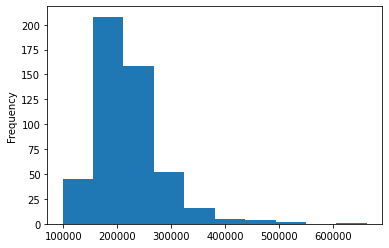


### Feature Summary: **track popularity**  
 - Mean: 47.212
 - Std: 19.802

        

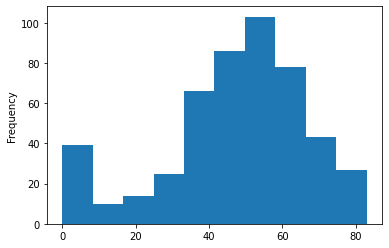


### Feature Summary: **track danceability**  
 - Mean: 0.637
 - Std: 0.145

        

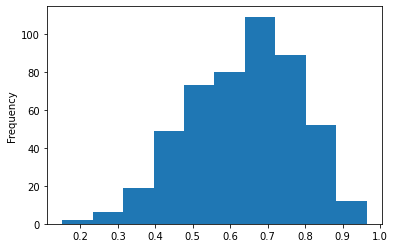


### Feature Summary: **track energy**  
 - Mean: 0.692
 - Std: 0.154

        

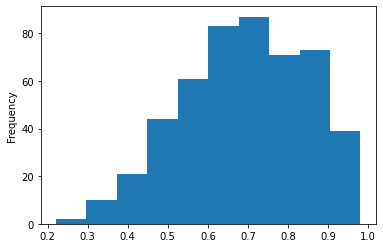


### Feature Summary: **track key**  
 - Mean: 5.403
 - Std: 3.49

        

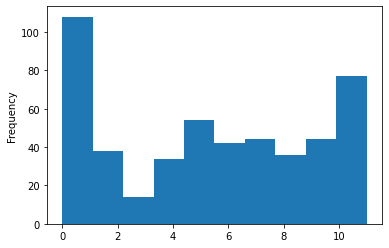


### Feature Summary: **track loudness**  
 - Mean: -6.421
 - Std: 2.199

        

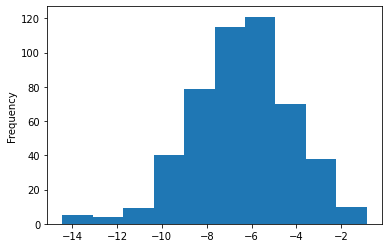


### Feature Summary: **track mode**  
 - Mean: 0.564
 - Std: 0.496

        

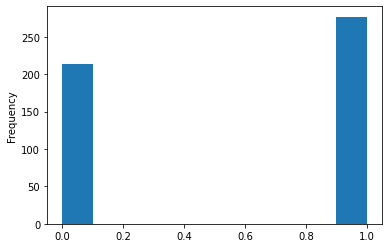


### Feature Summary: **track speechiness**  
 - Mean: 0.155
 - Std: 0.131

        

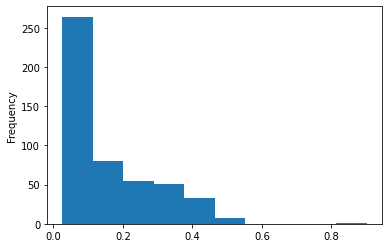


### Feature Summary: **track acousticness**  
 - Mean: 0.172
 - Std: 0.2

        

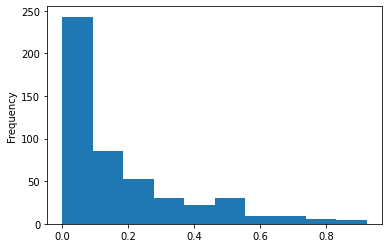


### Feature Summary: **track instrumentalness**  
 - Mean: 0.038
 - Std: 0.138

        

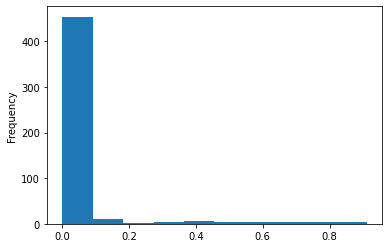


### Feature Summary: **track liveness**  
 - Mean: 0.22
 - Std: 0.165

        

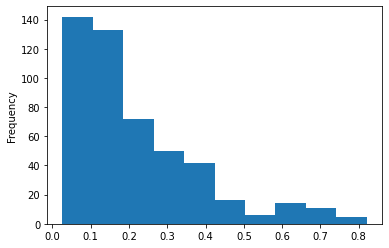


### Feature Summary: **track valence**  
 - Mean: 0.521
 - Std: 0.22

        

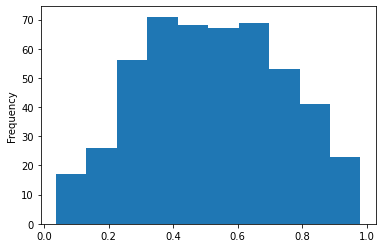


### Feature Summary: **track tempo**  
 - Mean: 119.347
 - Std: 31.009

        

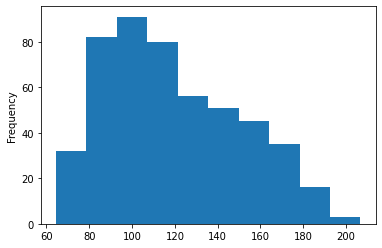


### Feature Summary: **track time signature**  
 - Mean: 3.974
 - Std: 0.258

        

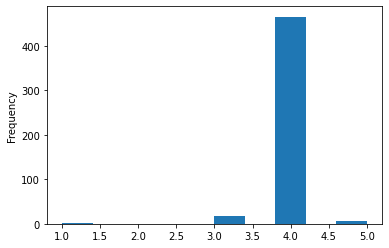

In [25]:
for col in WoofBeats_df.columns:
    if type(WoofBeats_df[col][0]) in [np.float64, np.int64]:
        displaym("""
### Feature Summary: **{}**  
 - Mean: {}
 - Std: {}

        """.format(
            col.replace("_"," "),
            round(WoofBeats_df[col].mean(),3),
            round(WoofBeats_df[col].std(),3)
        ))
        WoofBeats_df[col].plot.hist()
        plt.show()

In [73]:
categorical_features = [
    "album_name",
    "artist_name",
    "playlist_name",
    "added_by"
]

for col in categorical_features:
    sorted_categories = WoofBeats_df[[col]].groupby(col) \
            .size() \
            .sort_values(ascending=False) \
            .reset_index()
    
    displaym("""
### Feature Summary: **{}**  
 - Most Common: {}
 - Least Common: {}
    """.format(
        col.replace("_"," "),
        sorted_categories[col][0],
        sorted_categories[col][len(sorted_categories[col])-1]
    ))
    display(sorted_categories.head())
# dir(WoofBeats_df[categorical_features[0]].plot)


### Feature Summary: **album name**  
 - Most Common: Donda
 - Least Common: x (Deluxe Edition)
    

,album_name,0
0,Donda,4
1,Gooey,3
2,Ugly is Beautiful,3
3,The Tragedian's Decoupage,3
4,Complicate Your Life with Violence,3



### Feature Summary: **artist name**  
 - Most Common: Yung Gravy
 - Least Common: ¿Téo?
    

,artist_name,0
0,Yung Gravy,13
1,A$AP Rocky,9
2,Kanye West,8
3,Mac Miller,7
4,$uicideboy$,6



### Feature Summary: **playlist name**  
 - Most Common: WoofBeats-2021-01
 - Least Common: WoofBeats-2021-11
    

,playlist_name,0
0,WoofBeats-2021-01,56
1,WoofBeats-2021-04,50
2,WoofBeats-2021-06,50
3,WoofBeats-2020-12,46
4,WoofBeats-2021-02,45



### Feature Summary: **added by**  
 - Most Common: davidmimorton
 - Least Common: beet1eman
    

,added_by,0
0,davidmimorton,181
1,Dakota,157
2,Dan,149
3,1243264703,2
4,beet1eman,2
